## Image Segmentation Using K-means

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [25]:
im =  cv2.imread('elephant.jpg') #Reads an image into BGR Format

im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(330, 500, 3)


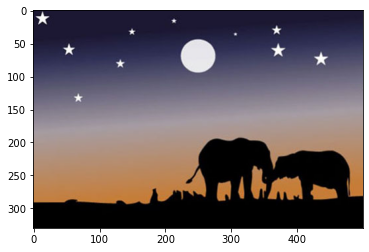

In [26]:
plt.imshow(im) # as RGB Format
plt.show()

In [27]:
# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

(165000, 3)


In [28]:
from sklearn.cluster import KMeans #importing kmeans from sklearn(clustering)

In [29]:
dominant_colors = 4
km = KMeans(n_clusters=dominant_colors)#here I am using 4 colors and clusters
km.fit(all_pixels)# here I am trying to find 4 dominant colors and trying to cluster all the color into 4 types of colors
#each pixel will be alloted one color

KMeans(n_clusters=4)

In [30]:
centers = km.cluster_centers_ #these are the rgb values of the colors
centers = np.array(centers,dtype='uint8')

In [31]:
print(centers)# these are the rgb values for each colors row-wise

[[175 145 128]
 [ 38  35  64]
 [  1   0   1]
 [ 99  95 118]]


### Plot what all colors are these

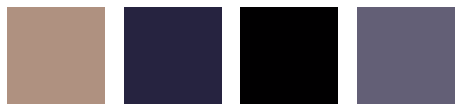

In [32]:
i = 1

plt.figure(0,figsize=(8,2))


colors = []

for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    #Color Switch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()

### Segmenting the original image

In [33]:
new_img = np.zeros((330*500,3),dtype='uint8')

print(new_img.shape)

(165000, 3)


In [34]:
colors

[array([175, 145, 128], dtype=uint8),
 array([38, 35, 64], dtype=uint8),
 array([1, 0, 1], dtype=uint8),
 array([ 99,  95, 118], dtype=uint8)]

In [35]:
km.labels_

array([1, 1, 1, ..., 2, 2, 2])

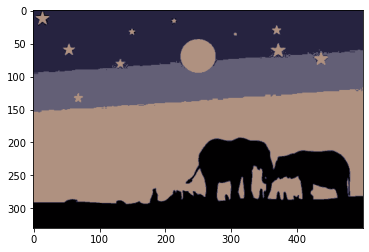

In [36]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()
#final result segmented into the 4 colors the original image